# IMPORTING LIBRARIES

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split

# UPLOADING DATASET

In [11]:
df = pd.DataFrame(pd.read_csv('User_Data.csv'))
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [13]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
X = df.iloc[:, [2,3]].values
Y = df.iloc[:, 4].values

In [18]:
#Splitting the dataset into Training set and Testing set

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size  = 0.25, random_state = 0) 

In [19]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_Train = sc_x.fit_transform(X_Train)
X_Test = sc_x.transform(X_Test)

In [20]:
# Fitting Logistic Regression 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_Train, Y_Train)

LogisticRegression(random_state=0)

In [22]:
Y_Pred = classifier.predict(X_Test)
Y_Pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [23]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[65,  3],
       [ 8, 24]])

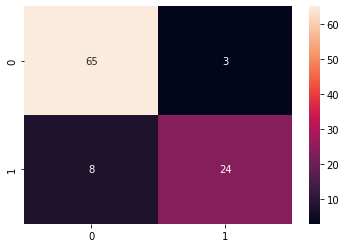

In [25]:
# Heatmap of Confusion matrix
sb.heatmap(pd.DataFrame(cm), annot=True)

In [26]:
from sklearn.metrics import accuracy_score

accuracy =accuracy_score(Y_Test, Y_Pred)
accuracy

0.89